In [4]:

# 🏏 IPL Team Runs Prediction using Regression Models

## 📦 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error





















In [5]:
## 📂 2. Load and Clean Data
df = pd.read_csv(r"C:\Users\DELL\Downloads\IPL.csv")
high_na_cols = ['team_reviewed', 'umpire', 'review_batter', 'review_decision', 'method',
                'superover_winner', 'result_type', 'fielders', 'new_batter', 'next_batter']
id_text_cols = ['Unnamed: 0', 'match_id', 'event_name', 'batter', 'bowler', 'non_striker',
                'extra_type', 'wicket_kind', 'player_out', 'batting_partners',
                'review_batter', 'umpire', 'player_of_match', 'venue', 'city', 'team_type']
cols_to_drop = list(set(high_na_cols + id_text_cols))
df_cleaned = df.drop(columns=cols_to_drop).dropna()


C:\Users\DELL\AppData\Local\Temp\ipykernel_27384\3953432038.py:2: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\DELL\Downloads\IPL.csv")


In [8]:
## 🧠 3. Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()

categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()

for col in categorical_cols:
    # Fill NaN temporarily with a string so LabelEncoder can work
    df_encoded[col] = df_encoded[col].astype(str).fillna("Missing")
    
    # Fit and transform
    df_encoded[col] = le.fit_transform(df_encoded[col])

C:\Users\DELL\AppData\Local\Temp\ipykernel_27384\1920793526.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


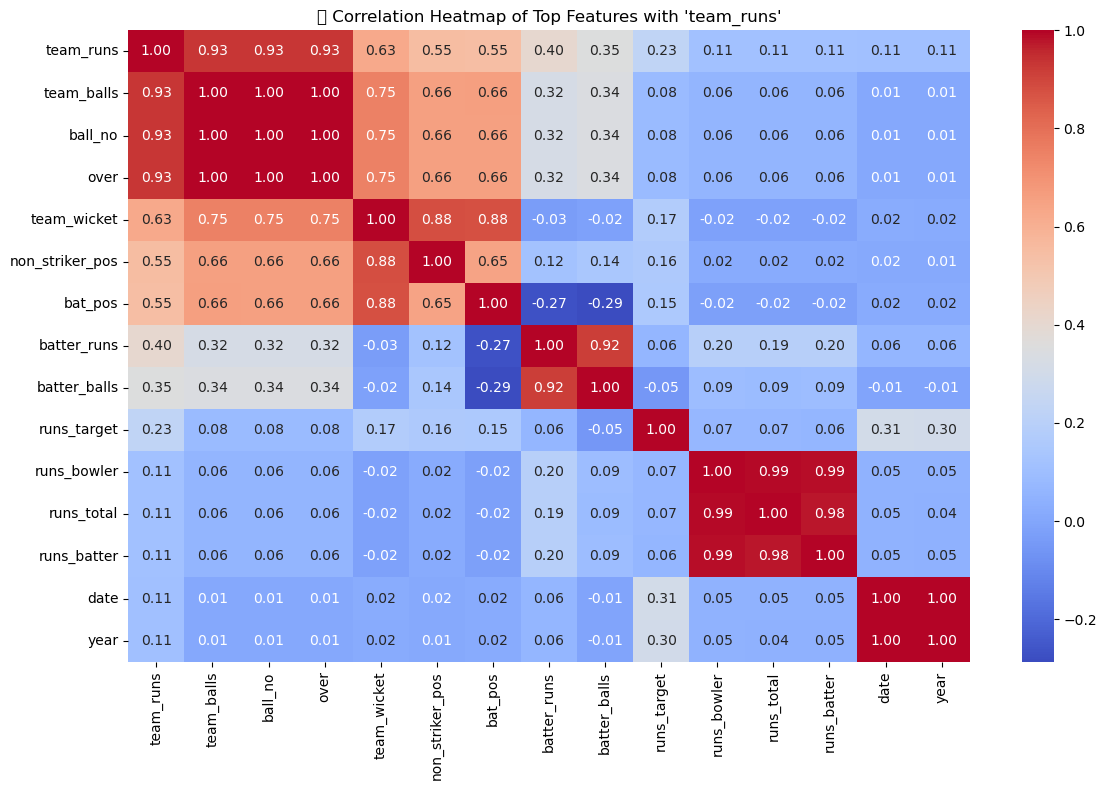

In [9]:
## 🔍 4. Correlation Heatmap
corr_matrix = df_encoded.corr(numeric_only=True)
top_corr = corr_matrix['team_runs'].abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Correlation Heatmap of Top Features with 'team_runs'")
plt.tight_layout()
plt.show()

In [10]:
## 📊 5. Feature Selection using RFE
X = df_encoded.drop('team_runs', axis=1)
y = df_encoded['team_runs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=15)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("✅ Top 15 Selected Features via RFE:")
print(selected_features)

✅ Top 15 Selected Features via RFE:
Index(['over', 'ball', 'ball_no', 'runs_batter', 'valid_ball', 'runs_extras',
       'runs_total', 'runs_not_boundary', 'umpires_call', 'year', 'season',
       'team_balls', 'team_wicket', 'bowler_wicket', 'striker_out'],
      dtype='object')


In [11]:

## 🤖 6. Train and Evaluate 8 Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "AdaBoost": AdaBoostRegressor()
}

In [13]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n📘 {name}")
    print("R2 Score:", round(r2_score(y_test, y_pred), 4))
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    print("-" * 40)
    for name, model in models.items():
     evaluate_model(name, model, X_train[selected_features], X_test[selected_features], y_train, y_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_27384\3010245805.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


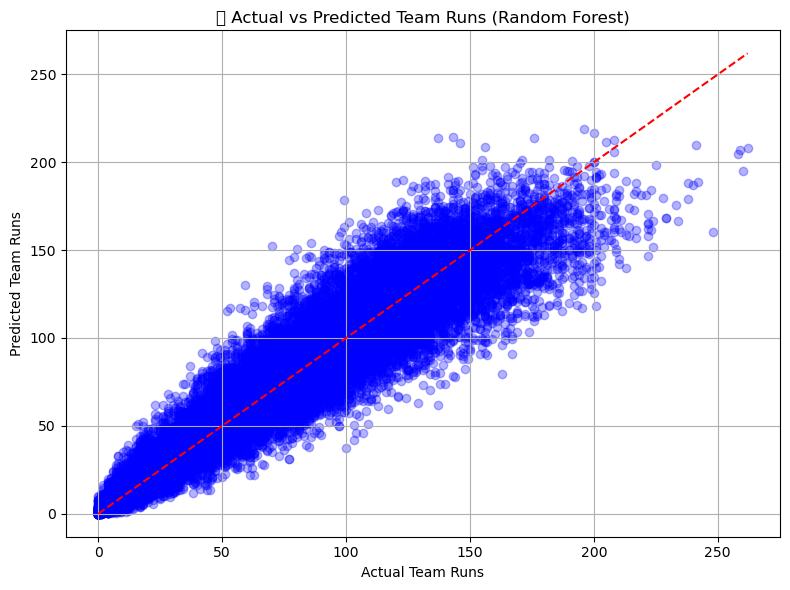

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
## 🎯 7. Visualize Actual vs Predicted (Random Forest)
best_model = RandomForestRegressor()
best_model.fit(X_train[selected_features], y_train)
y_pred = best_model.predict(X_test[selected_features])
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Team Runs")
plt.ylabel("Predicted Team Runs")
plt.title("📊 Actual vs Predicted Team Runs (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train[selected_features], y_train)
print("✅ Best Parameters:", grid_search.best_params_)
print("🔍 Best R² Score on CV:", grid_search.best_score_)


In [17]:
## 🔧 8. Hyperparameter Tuning (GridSearchCV)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

C:\Users\DELL\AppData\Local\Temp\ipykernel_27384\1905632435.py:8: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


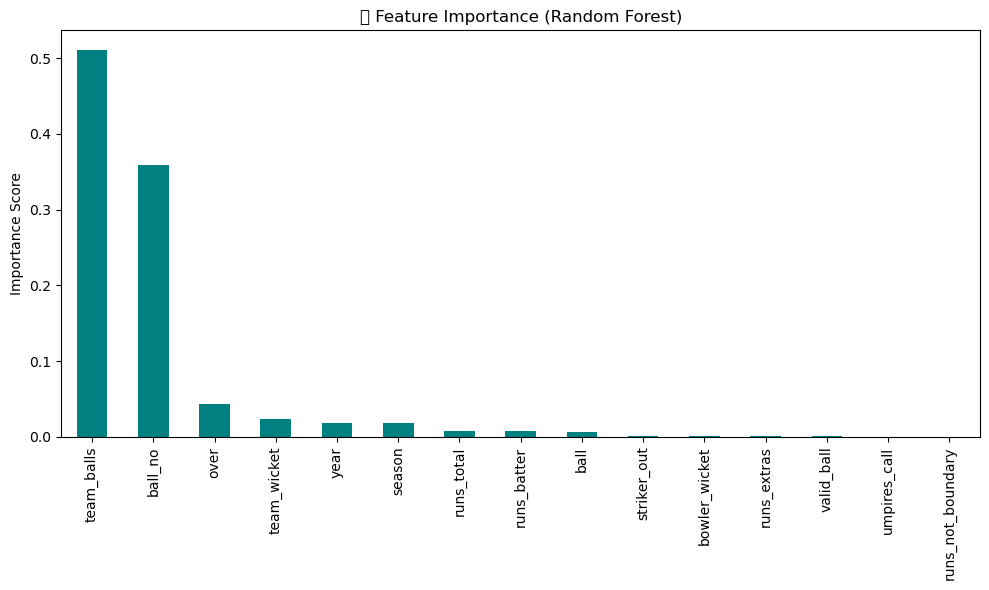

In [18]:
## 📌 9. Feature Importance (Random Forest)
importances = best_model.feature_importances_
feat_importance = pd.Series(importances, index=selected_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feat_importance.plot(kind='bar', color='teal')
plt.title("📌 Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



🔎 Logistic Regression
Accuracy: 0.9619
Precision: 0.6064
Recall: 0.304
F1 Score: 0.405


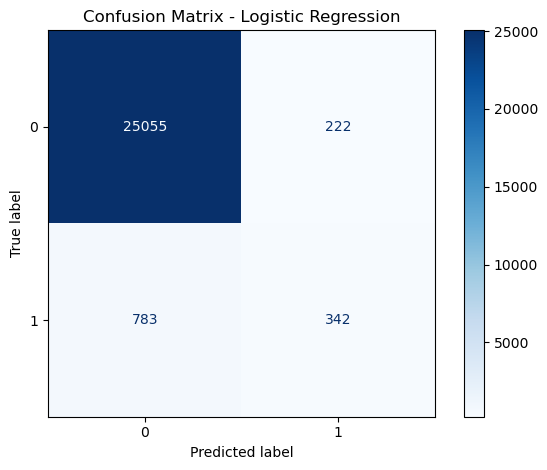

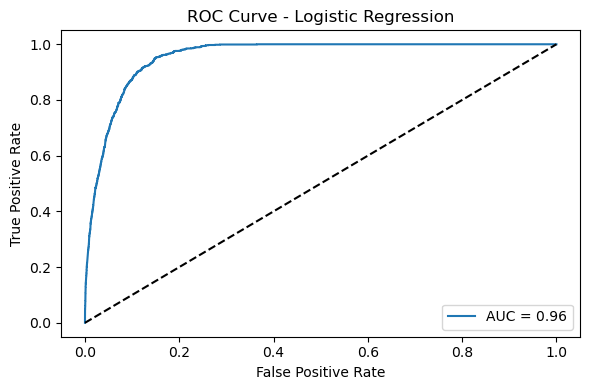


🔎 Decision Tree
Accuracy: 0.9539
Precision: 0.4504
Recall: 0.3716
F1 Score: 0.4072


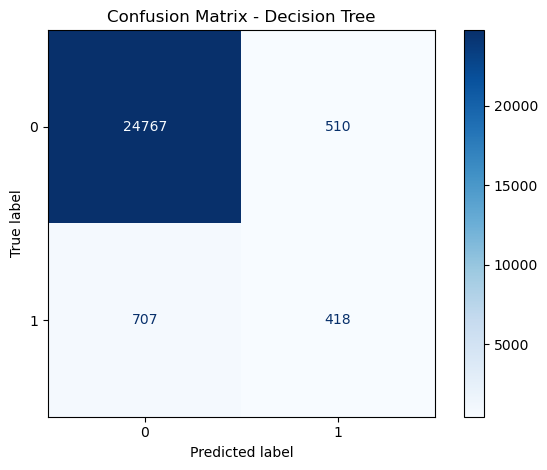

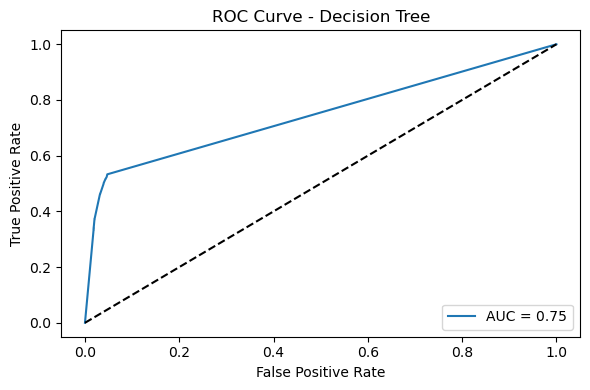


🔎 Random Forest
Accuracy: 0.9553
Precision: 0.4693
Recall: 0.3742
F1 Score: 0.4164


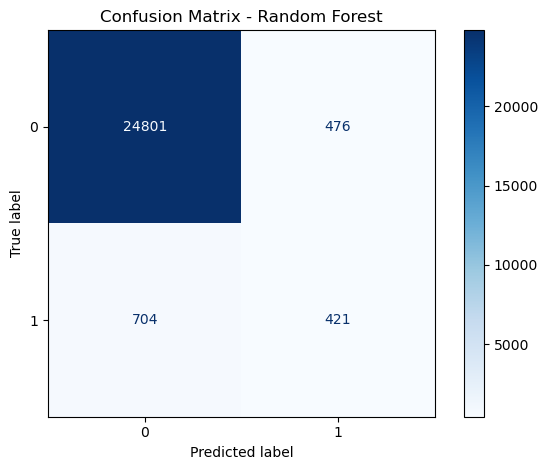

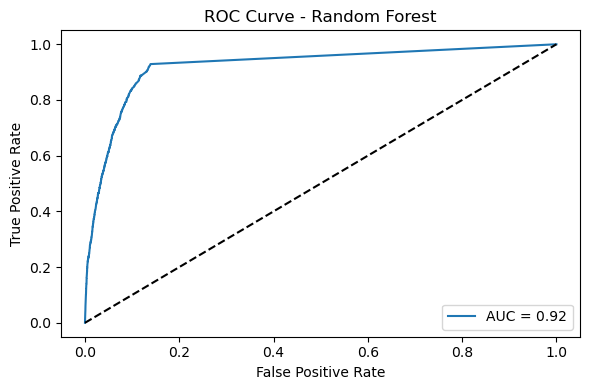


🔎 Gradient Boosting
Accuracy: 0.9641
Precision: 0.6381
Recall: 0.3636
F1 Score: 0.4632


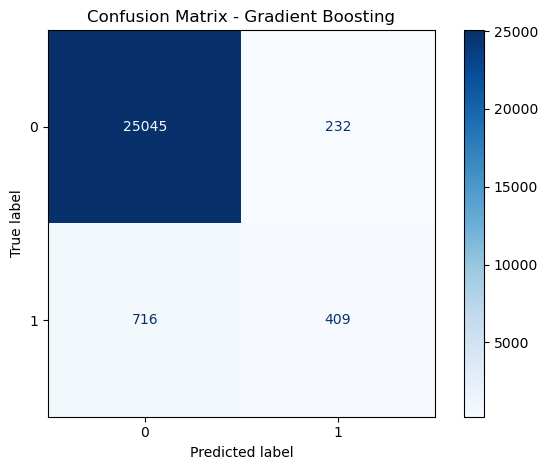

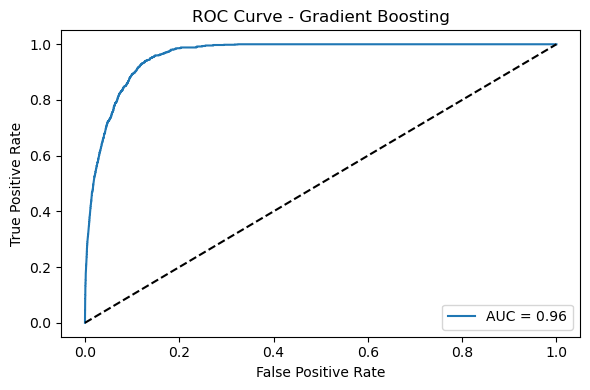

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🔎 AdaBoost
Accuracy: 0.9621
Precision: 0.5868
Recall: 0.3724
F1 Score: 0.4557


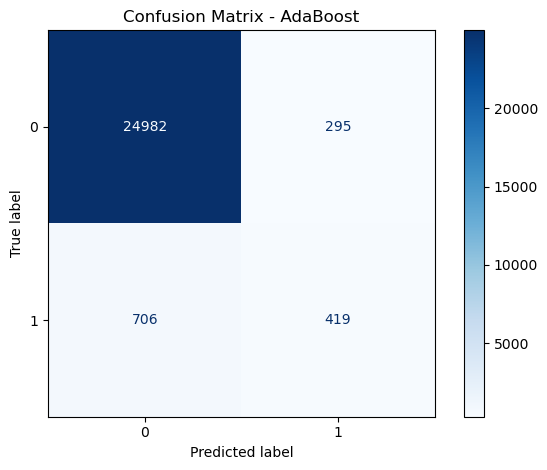

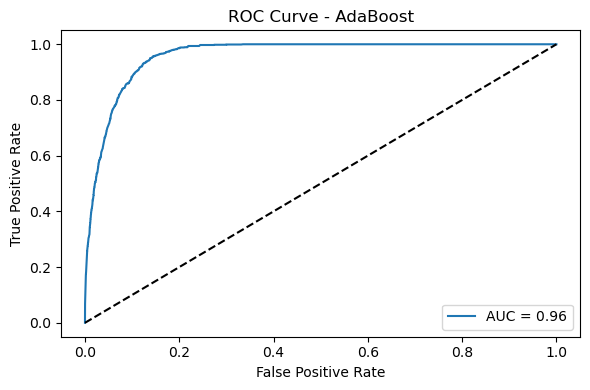

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:41:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔎 XGBoost
Accuracy: 0.9647
Precision: 0.6391
Recall: 0.392
F1 Score: 0.486


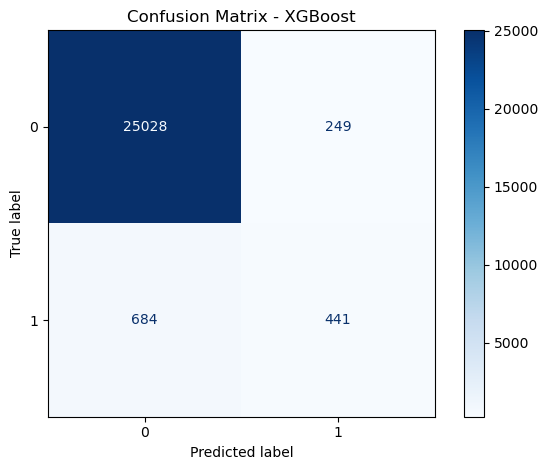

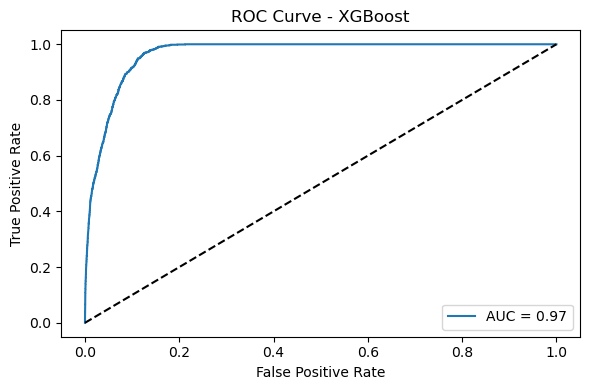


🔎 KNN
Accuracy: 0.9583
Precision: 0.5154
Recall: 0.3573
F1 Score: 0.422


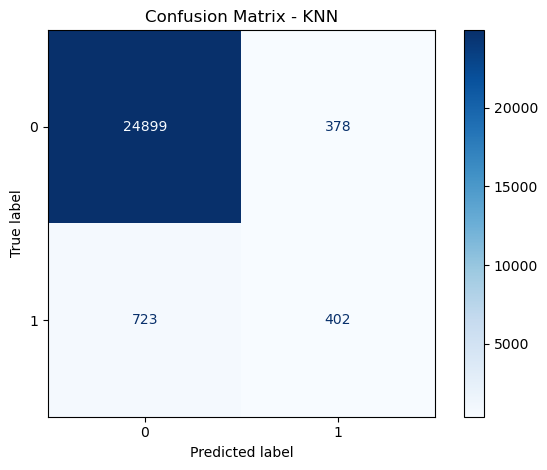

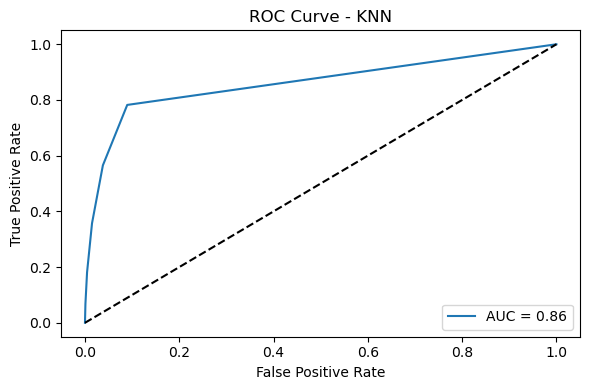


🔎 SVC
Accuracy: 0.9574
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


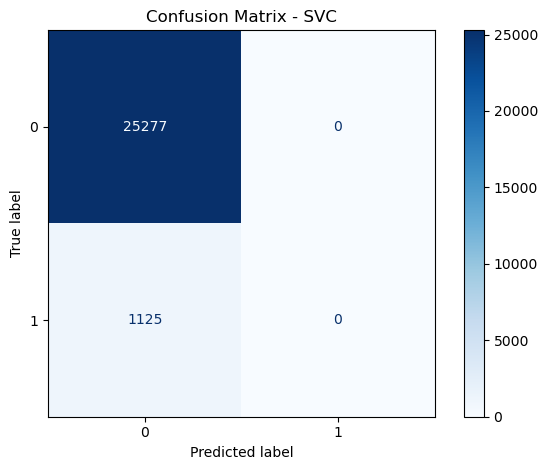

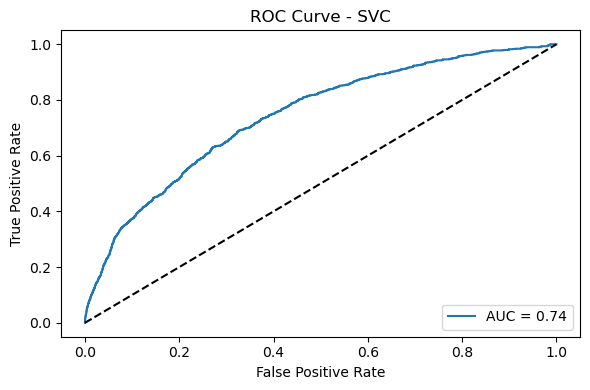

C:\Users\DELL\AppData\Local\Temp\ipykernel_27384\4237348482.py:76: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


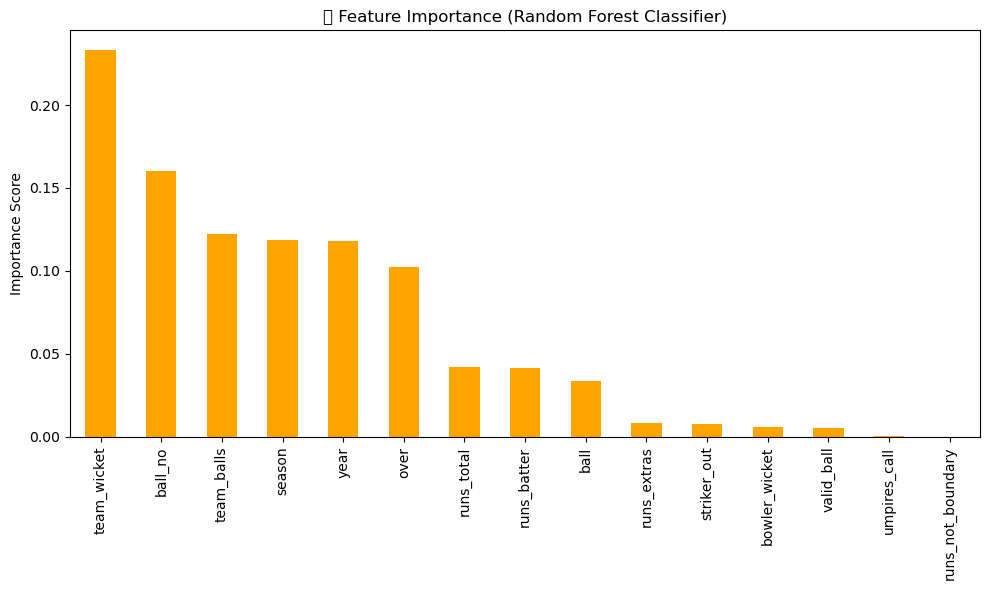

In [19]:

## 🧪 Binary Classification: Predict High vs Low Team Runs

# Create a binary target
df_encoded['high_score'] = (df_encoded['team_runs'] > 160).astype(int)

# Define inputs and target
X_cls = df_encoded[selected_features]
y_cls = df_encoded['high_score']

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True)
}

# Train and evaluate classifiers
for name, model in classifiers.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    y_proba = model.predict_proba(X_test_cls)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"\n🔎 {name}")
    print("Accuracy:", round(accuracy_score(y_test_cls, y_pred), 4))
    print("Precision:", round(precision_score(y_test_cls, y_pred), 4))
    print("Recall:", round(recall_score(y_test_cls, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test_cls, y_pred), 4))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    
    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test_cls, y_proba)
        auc_score = roc_auc_score(y_test_cls, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

# Feature Importance from Random Forest Classifier
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train_cls, y_train_cls)
importances_cls = pd.Series(rf_cls.feature_importances_, index=selected_features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances_cls.plot(kind='bar', color='orange')
plt.title("📌 Feature Importance (Random Forest Classifier)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()
